# Tutorial 5: Lagged regressors

Lagged regressors are used to correlate other observed variables to our target time series. For example the temperature of the previous days might be a good predictor of the temperature of the next day.

They are often referred to as exogenous variables or as covariates. Unlike future regressors, the future of a lagged regressor is unknown to us.

At the time $t$ of forecasting, we only have access to their observed, past values up to and including $t − 1$.

$$\text{Lagged regressor}(t) = L(t) = \sum_{x \in X}L_x(x_{t-1},x_{t-2},...,x_{t-p})$$

First we load a new dataset which also contains the temperature.

In [2]:
import pandas as pd

# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial04.csv")
df.head()

,ds,y,temperature
0,2015-01-01,64.92,277.00
1,2015-01-02,58.46,277.95
2,2015-01-03,63.35,278.83
3,2015-01-04,50.54,279.64
4,2015-01-05,64.89,279.05


In [3]:
# Optional:To align the scale of temperature with the energy price, we convert it to Farenheit:
df["temperature"] = (df["temperature"] - 273.15) * 1.8 + 32

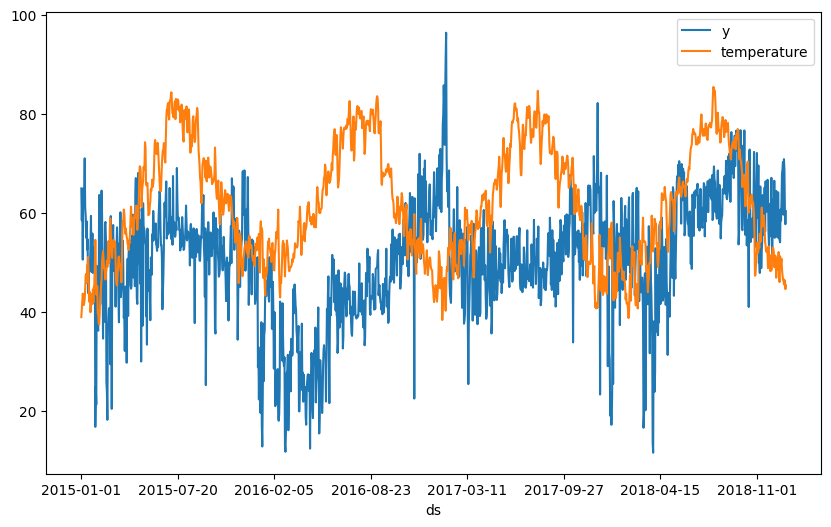

In [4]:
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

From the data we can see that there is a weak inverse relationship of electricity price to temperature. 
We start with our model from the previous tutorial and then add temperature as a lagged regressor to our model.

In [ ]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    n_lags=10,  # Autogression
)
m.set_plotting_backend("plotly-static")

# Add temperature of last three days as lagged regressor
m.add_lagged_regressor("temperature", n_lags=3)

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)

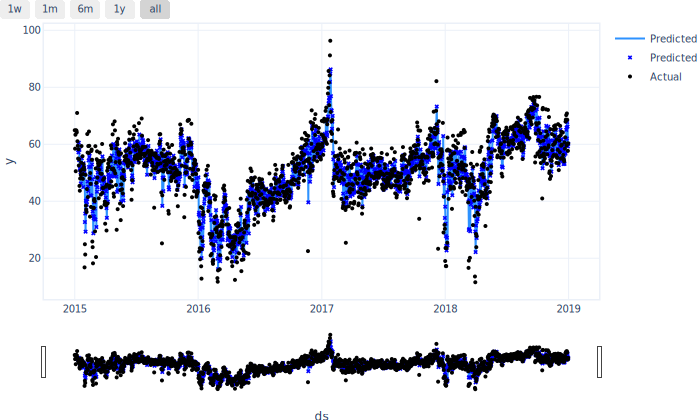

In [16]:
# set plotting to focus on forecasting horizon 1 (the only one for us here)
m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast)

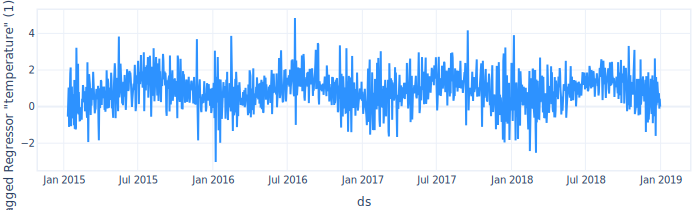

In [15]:
# show the component's forecast contribution
m.plot_components(forecast, components=["lagged_regressors"])

We see that the temperatur impact the forecasted price by few units. 
Compared to the overall price fluctuations, the temperature impact seems minor, but not insignificant.

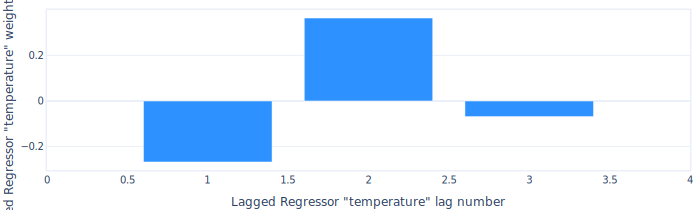

In [17]:
# visualize model parameters of lagged regression
m.plot_parameters(components=["lagged_regressors"])

The model learns a different weights for each of the lags, which may also capture changes in the direction of temperature.

Let us explore how our model improved after adding the lagged regressor.

In [20]:
metrics.tail(1)

,MAE,RMSE,Loss,RegLoss,epoch
172,4.936666,6.578746,0.00533,0.0,172


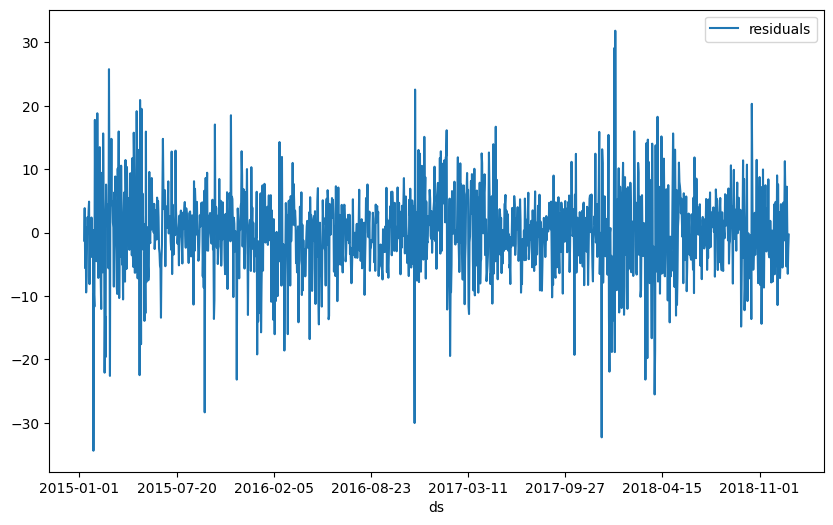

In [7]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))